Importando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


Adquirindo os dados da série temporal [Yahoo Finance](https://ca.finance.yahoo.com/quote/%5Evix/history?ltr=1)

[VIX - CBOE Volatility Index](https://en.wikipedia.org/wiki/VIX)

In [6]:
url = "https://raw.githubusercontent.com/hsandmann/espm.ml/master/mlp/vix_2011_2019.csv"
df = pd.read_csv(url)

In [7]:
print(df.head())

         Date       Open       High    Low      Close  Adj Close  Volume
0  2011-02-11  16.530001  16.530001  15.55  15.690000  15.690000       0
1  2011-02-14  16.070000  16.260000  15.22  15.950000  15.950000       0
2  2011-02-15  16.299999  16.750000  16.27  16.370001  16.370001       0
3  2011-02-16  16.309999  16.740000  15.84  16.719999  16.719999       0
4  2011-02-17  17.010000  17.299999  15.88  16.590000  16.590000       0


In [8]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 2 columns):
Date         2054 non-null object
Adj Close    2054 non-null float64
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df = df.set_index(['Date'], drop=True)

In [12]:
df.head(10)

,Adj Close
Date,
2011-02-11,15.690000
2011-02-14,15.950000
2011-02-15,16.370001
2011-02-16,16.719999
2011-02-17,16.590000
2011-02-18,16.430000
2011-02-22,20.799999
2011-02-23,22.129999
2011-02-24,21.320000


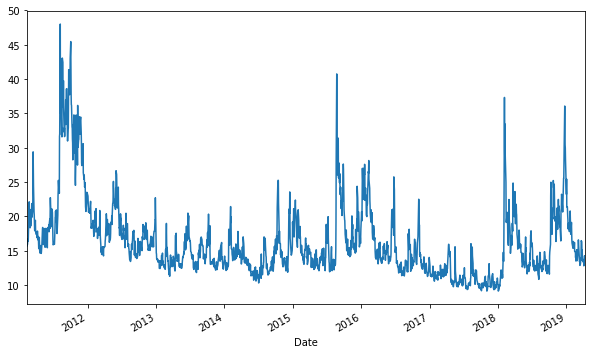

In [13]:
# df = df.sort_index()
plt.figure(figsize=(10, 6))
df['Adj Close'].plot();

In [14]:
split_date = pd.Timestamp('2018-01-01')

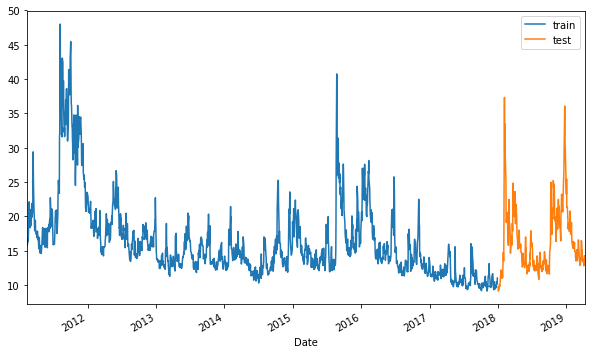

In [15]:
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

Normalizando os dados

In [ ]:
# scale train and test data to [-1, 1]
train_min = min(train)
train_max = max(train)
train_sc = (train - train_min) / (train_max - train_min) * 2 - 1

test_min = min(test)
test_max = max(test)
test_sc = (test - test_min) / (test_max - test_min) * 2 - 1

In [17]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

## Criando uma rede neural - NN

In [18]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu')) # Alterar número de neurônios da camada oculta.
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1732/1732 [==============================] - 4s 2ms/step - loss: 0.0136
Epoch 2/100
1732/1732 [==============================] - 4s 2ms/step - loss: 0.0069
Epoch 3/100
1732/1732 [==============================] - 4s 2ms/step - loss: 0.0065
Epoch 4/100
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0063
Epoch 5/100
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0063
Epoch 6/100
1732/1732 [==============================] - 4s 2ms/step - loss: 0.0062
Epoch 7/100
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0062
Epoch 8/100
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0062
Epoch 9/100
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0061
Epoch 10/100
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0061
Epoch 11/100
1732/1732 [===============

### Executando com as amostras de treinamento e testes

In [20]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)

### Analisando os resultados

In [37]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('Error: %f'%nn_test_mse)


The R2 score on the Train set is:	0.904
The R2 score on the Test set is:	0.797
320/320 [==============================] - 0s 538us/step
NN: 0.022228
